<a href="https://colab.research.google.com/github/rohitha077/codealpha_tasks/blob/main/task3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Original Data Head ---
         income          debt  credit_history_score employment_status  \
0  57450.712295  16996.777183                 713.0          Employed   
1  47926.035482  14623.168415                 657.0     Self-Employed   
2  59715.328072  10298.151850                 374.0          Employed   
3  72845.447846   6765.316111                 654.0          Employed   
4  46487.699379  13491.116568                 487.0     Self-Employed   

    loan_amount  loan_duration  num_credit_accounts  has_dependents  \
0  23458.103605             15                    3               1   
1  23760.353499             27                    2               0   
2  14338.992841             41                    7               0   
3  14302.609087             55                    9               1   
4  19114.677052             41                    4               0   

  marital_status  age creditworthiness  
0        Married   57              Bad  
1        Married   22    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

--- Random Forest Results ---
Accuracy: 0.7250
Precision: 0.5000
Recall: 0.0182
ROC-AUC: 0.5376

Classification Report:
              precision    recall  f1-score   support

 Good Credit       0.73      0.99      0.84       145
  Bad Credit       0.50      0.02      0.04        55

    accuracy                           0.72       200
   macro avg       0.61      0.51      0.44       200
weighted avg       0.66      0.72      0.62       200


Training XGBoost...
--- XGBoost Results ---
Accuracy: 0.6800
Precision: 0.3548
Recall: 0.2000
ROC-AUC: 0.5876

Classification Report:
              precision    recall  f1-score   support

 Good Credit       0.74      0.86      0.80       145
  Bad Credit       0.35      0.20      0.26        55

    accuracy                           0.68       200
   macro avg       0.55      0.53      0.53       200
weighted avg       0.63      0.68      0.65       200


--- Summary of All Model Results ---
Logistic Regression:
  Accuracy: 0.7250
  Precision: 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:34:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


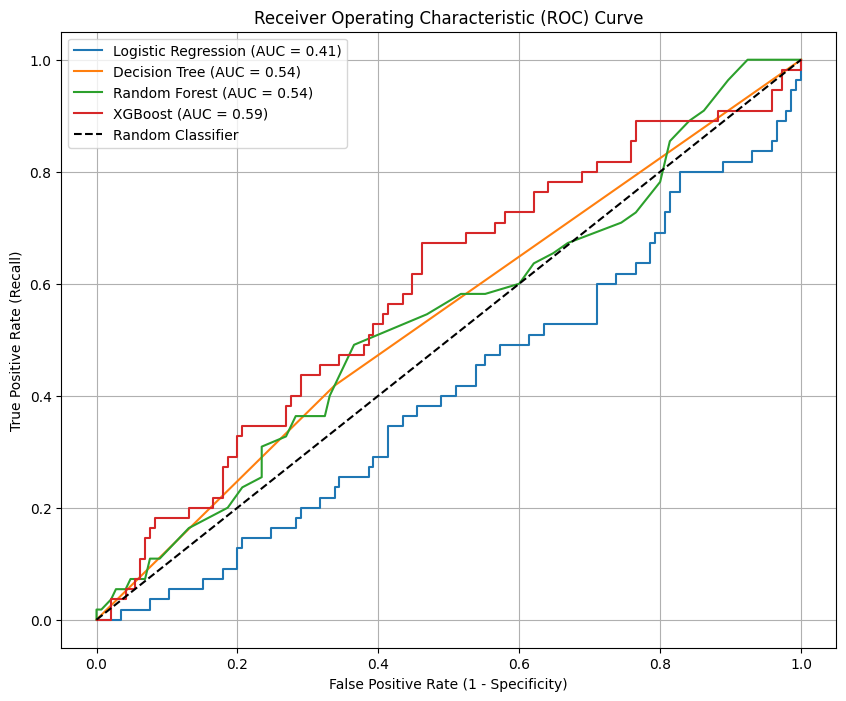

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
n_samples = 1000
data = {
    'income': np.random.normal(50000, 15000, n_samples),
    'debt': np.random.normal(10000, 5000, n_samples),
    'credit_history_score': np.random.randint(300, 850, n_samples),
    'employment_status': np.random.choice(['Employed', 'Self-Employed', 'Unemployed', 'Student'], n_samples),
    'loan_amount': np.random.normal(20000, 8000, n_samples),
    'loan_duration': np.random.randint(12, 60, n_samples),
    'num_credit_accounts': np.random.randint(1, 10, n_samples),
    'has_dependents': np.random.choice([0, 1], n_samples),
    'marital_status': np.random.choice(['Single', 'Married', 'Divorced'], n_samples),
    'age': np.random.randint(20, 70, n_samples),
    'creditworthiness': np.random.choice(['Good', 'Bad'], n_samples, p=[0.7, 0.3])
}
df = pd.DataFrame(data)
for col in ['income', 'debt', 'credit_history_score']:
    missing_indices = np.random.choice(df.index, int(n_samples * 0.05), replace=False)
    df.loc[missing_indices, col] = np.nan
print("--- Original Data Head ---")
print(df.head())
print("\n--- Missing Values Before Preprocessing ---")
print(df.isnull().sum())
X = df.drop('creditworthiness', axis=1)
y = df['creditworthiness']
y = y.map({'Good': 0, 'Bad': 1})
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()
print(f"\nNumerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}
results = {}
roc_curves = {}
print("\n--- Training and Evaluating Models ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', model)])
    full_pipeline.fit(X_train, y_train)
    y_pred = full_pipeline.predict(X_test)
    y_prob = full_pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC-AUC': roc_auc
    }
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr}
    print(f"--- {name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Good Credit', 'Bad Credit']))
print("\n--- Summary of All Model Results ---")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print("-" * 30)
plt.figure(figsize=(10, 8))
for name, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label=f'{name} (AUC = {results[name]["ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()